# <b> DATA ANALYSIS : </b>

> <h2> <b>An Analysis on Olympics Dataset (Factors Responsible for a medalist.)</b></h2>

<b> <h3>Description: </h3></b>
* The dedication and hard work put in by Olympic athletes to win a medal every four years is truly impressive. However, despite the large number of Olympians, only a few become household names such as Michael Phelps, Simone Biles, and Usain Bolt, who have repeatedly won medals in their events. What sets these athletes apart and enables them to consistently win, while so many others do not? Is there a way to quantitatively determine the type of athlete who is likely to win a medal?

* The primary objective of this data visualization and analysis project is to uncover insights and identify the key factors that contribute to an athlete winning a medal in the Olympics. Through a comprehensive exploration of the data, the project aims to provide a deeper understanding of the various factors that are responsible for an athlete's success in achieving a medal.

______________________

### <b> Importing Libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
%matplotlib inline
warnings.filterwarnings('ignore')

In [10]:
## LOADING THE DATASET :
df_athlete = pd.read_csv('Datasets/athlete_events.csv')
df_regions = pd.read_csv('Datasets/noc_regions.csv')


print (f'ATHLETE DATAFRAME:\n Rows : {df_athlete.shape[0]}, Columns : {df_athlete.shape[1]}')
display(df_athlete.head())

print (f'REGIONS DATAFRAME:\n Rows : {df_regions.shape[0]}, Columns : {df_regions.shape[1]}')
display(df_regions.head())

ATHLETE DATAFRAME:
 Rows : 271116, Columns : 15


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


REGIONS DATAFRAME:
 Rows : 230, Columns : 3


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [25]:
# MERGING BOTH THE DATAFRAMES :
df_final = pd.merge(df_athlete, df_regions, on = 'NOC', how= 'left').reset_index(drop= True)

print (f'Shape of Merged Dataframe: {df_final.shape}')
df_final.head(3)

Shape of Merged Dataframe: (271116, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


In [27]:
# Getting the info about the final dataframe:
# INFO LIKE : Data type of each column and presence of non-null values with memory usage 
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 35.2+ MB


In [28]:
# Getting the statistical Summary of the dataframe :
df_final.describe()   # Just for all numerical Columns 

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### <b> NULL Values:

In [32]:
# Checking columns with null values :
df_final.isna().any()

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
region     True
notes      True
dtype: bool

> Columns with null values: Age, Height, Weight, Medal, Region and notes.

In [37]:
# total Number of null values for above 6 columns which are having null vallues.

for key, values in df_final.isnull().sum().items():
    if values> 0:
        print (key , ": ", values)

Age :  9474
Height :  60171
Weight :  62875
Medal :  231333
region :  370
notes :  266077


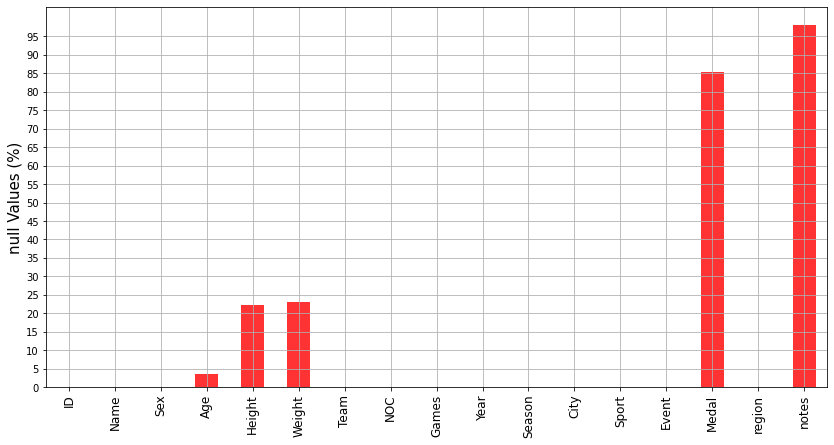

In [30]:
# Plotting the percentage of Null values present in each Column:
plt.figure(figsize = (14,7))
(df_final.isna().sum()/len(df_final)*100).plot(kind = 'bar', color = 'red', alpha = 0.8, width = 0.5)
plt.xticks(size = 12)
plt.yticks(np.arange(0,100,5))
plt.ylabel('null Values (%)', size = 15)
plt.grid()
plt.show()

_______________________________________________

### <b> INDIAN ATHLETES 

In [39]:
# Dataset of Indian Athletes:

df_final[df_final['Team'] == 'India'].head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN


## <b> Exploratory Data Analysis

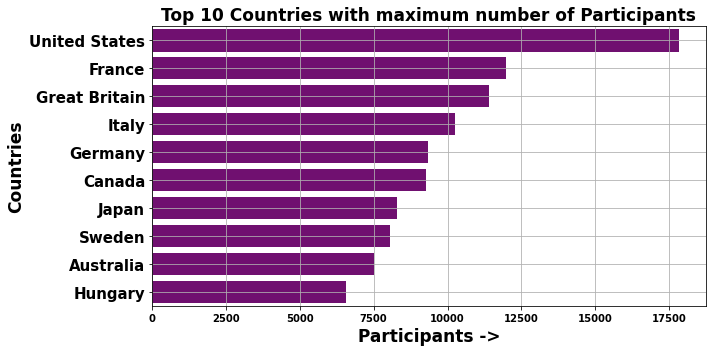

In [80]:
# WE CAN ALSO PLOT THE NUMBER OF ATHLETES PARTICIPATING FROM DIFFERENT COUNTRIES.
plt.figure(figsize = (10,5))

# Method 1 of plotting 
# df_final.Team.value_counts()[:30].sort_values(ascending= True).plot(kind = 'barh', color  = 'purple', width  = 0.8)

# method 2 of plotting 
sns.barplot(x =df_final.Team.value_counts()[:10].sort_values(ascending= False).values, 
            y = df_final.Team.value_counts()[:10].sort_values(ascending= False).index,
            color= 'purple' ,
            orient= 'h')

plt.yticks(size = 15, fontweight = 'bold')
plt.xticks(size = 10, fontweight = 'bold')
plt.ylabel('Countries',size = 17, fontweight = 'bold')
plt.xlabel('Participants ->',size = 17, fontweight = 'bold')
plt.grid()
plt.title('Top 10 Countries with maximum number of Participants',size = 17, fontweight = 'bold')
plt.tight_layout()
plt.show()


> This Shows that the United States has maximum number of Athletes participated in Olympics.

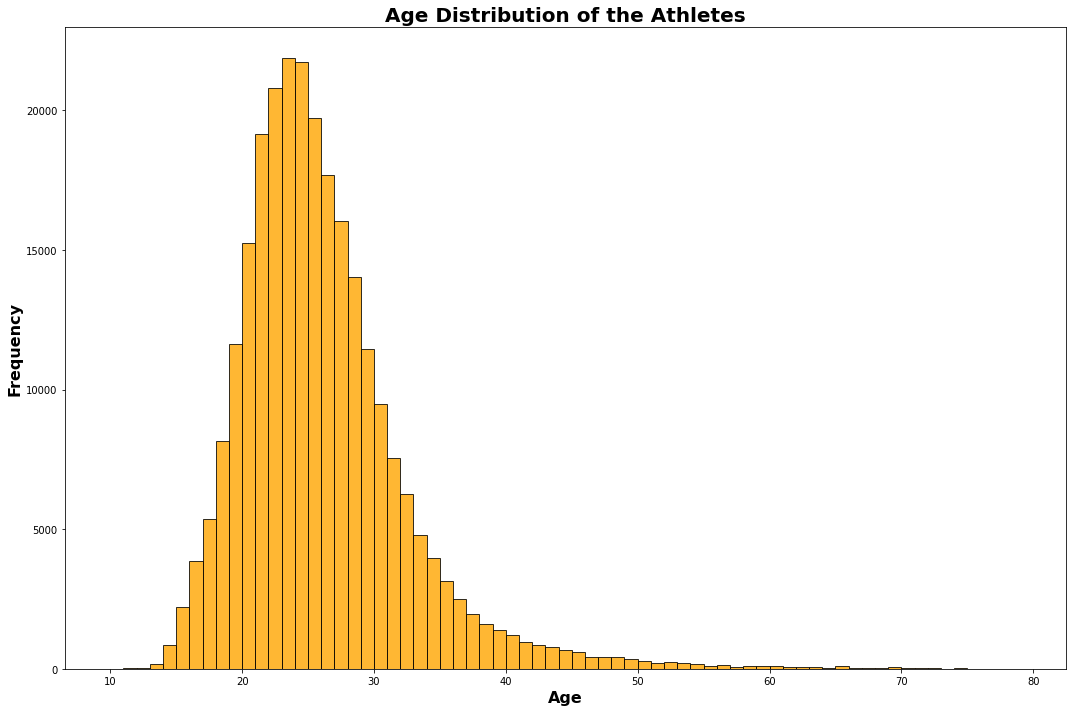

In [101]:
## AGE DISTIBUTION OF THE PARTICIPANTS :

plt.figure(figsize = (15,10))
plt.title('Age Distribution of the Athletes', size = 20, fontweight = 'bold')
plt.xlabel('Age', size = 16, fontweight = 'bold')
plt.ylabel('Number of Athletes', size = 16, fontweight = 'bold')
df_final['Age'].plot(kind = 'hist', bins = np.arange(10, 80, 1), color = 'orange',edgecolor = 'black' ,alpha = 0.8)
plt.tight_layout()
plt.show()

> Athletes in their early 20s' are more liklely to participate in olympics.

## <b> Winter Olympic Games : 

In [115]:
# Sports held in Summmer Olympics :

winter_olympics = df_final[df_final['Season'] == 'Winter']
winter_olympics.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN,Netherlands,NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [116]:
pd.DataFrame(winter_olympics['Sport'].unique(), columns= ['Winter Sports'])

,Winter Sports
0,Speed Skating
1,Cross Country Skiing
2,Ice Hockey
3,Biathlon
4,Alpine Skiing
5,Luge
6,Bobsleigh
7,Figure Skating
8,Nordic Combined
9,Freestyle Skiing


## <b> Summer Olympic Games : 

In [118]:
summer_olympics = df_final[df_final['Season'] == 'Summer']

pd.DataFrame(summer_olympics['Sport'].unique(), columns= ['Summer Sports'])

,Summer Sports
0,Basketball
1,Judo
2,Football
3,Tug-Of-War
4,Athletics
5,Swimming
6,Badminton
7,Sailing
8,Gymnastics
9,Art Competitions


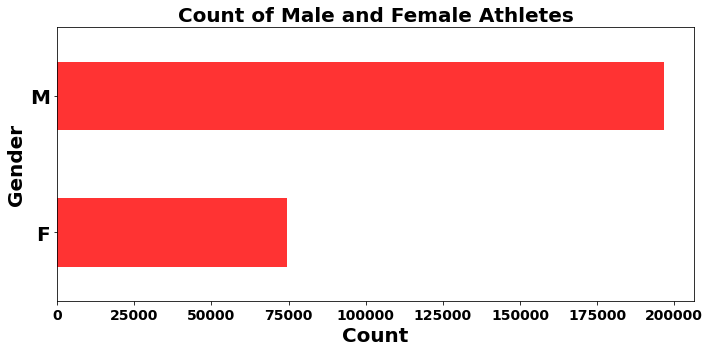

In [252]:
## COMPARISION ON MALE AND FEMALE PARTICIPANTS/ ATHLETES

plt.figure(figsize = (10,5))
df_final['Sex'].value_counts().sort_index().plot(kind = 'barh', color = 'red', alpha = 0.8)
plt.title('Count of Male and Female Athletes', size = 20, fontweight = 'bold')
plt.xlabel('Count', size = 20, fontweight = 'bold')
plt.ylabel('Gender', size = 20, fontweight = 'bold')
plt.yticks(size = 20, fontweight = 'bold')
plt.xticks(size = 14, fontweight = 'bold')
plt.tight_layout()
plt.show()

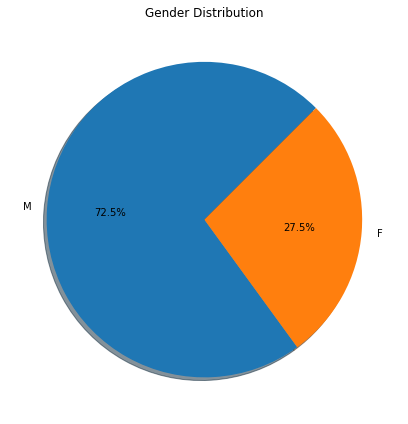

In [137]:
plt.figure(figsize= (12,6))

plt.title('Gender Distribution')
plt.pie(df_final['Sex'].value_counts(), labels= df_final['Sex'].value_counts().index,
        autopct= '%1.1f%%',
        startangle= 45,
        shadow= True)
plt.tight_layout()
plt.show()

> Male Athletes are significantly higher in number than the Female Athletes.

### <b> Total Medals 

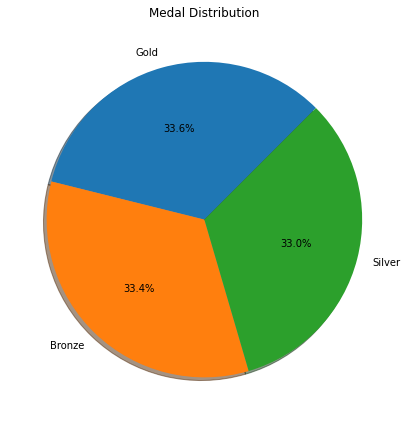

In [141]:
plt.figure(figsize= (12,6))

plt.title('Medal Distribution')
plt.pie(df_final['Medal'].value_counts(), labels= df_final['Medal'].value_counts().index,
        autopct= '%1.1f%%',
        startangle= 45,
        shadow= True)
plt.tight_layout()
plt.show()

> Types of Medal Distributions are almost the same. (as it should be)

### <b> Variation of Athletes (Male / Female) every year in olympics:

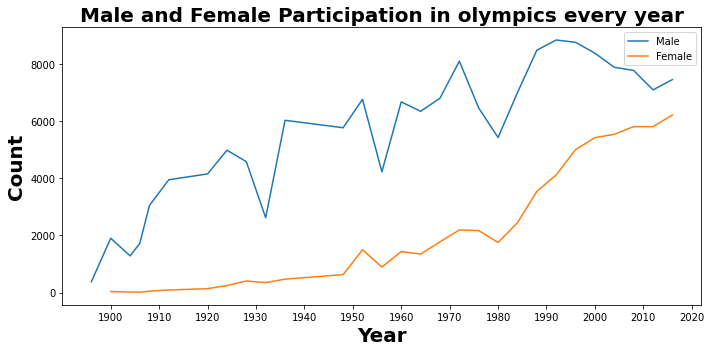

In [253]:
# TOTAL NUMBER OF MALE ATHLETES IN EACH OLYMPICS 

male_ath = df_final[(df_final['Sex'] == 'M') & (df_final['Season'] == 'Summer')][['Sex', 'Year']]
data_m = male_ath.groupby('Year').count().reset_index()

female_ath = df_final[(df_final['Sex'] == 'F') & (df_final['Season'] == 'Summer')][['Sex', 'Year']]
data_f = female_ath.groupby('Year').count().reset_index()

# Creating a Line PLot 

plt.figure(figsize= (10,5))

plt.plot(data_m.Year, data_m.Sex, label = 'Male')
plt.plot(data_f.Year, data_f.Sex, label = 'Female')

plt.xlabel('Year',size = 20, fontweight = 'bold')
plt.ylabel('Count',size = 20, fontweight = 'bold')
plt.title('Male and Female Participation in olympics every year', size = 20, fontweight = 'bold')
plt.xticks(np.arange(data_f.Year.min(), data_f.Year.max()+10, 10))
plt.legend()
plt.tight_layout()
plt.show()

> The number of Female Athletes is gradually incresing with the time especially after 1980 olympics.

### <b> Gold Medals Athletes 

In [205]:
df_gold = df_final[df_final['Medal'] == 'Gold']
df_gold.head(4)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN


In [206]:
## Omitting those rows having null values from this dataframe:
df_gold = df_gold[np.isfinite(df_gold.Age)]
df_gold.isnull().sum()

ID            0
Name          0
Sex           0
Age           0
Height     2692
Weight     2976
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
region        1
notes     13053
dtype: int64

#### <b> Gold Medalist having age more than 60 Years 

In [208]:
## GOLD MEDALIST BEYOND 60 YEARA OF AGE :
df_gold[df_gold.Age > 60]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
104003,52626,Isaac Lazarus Israls,M,63.0,NaN,NaN,Netherlands,NED,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Paintings",Gold,Netherlands,NaN
105199,53238,Charles Jacobus,M,64.0,NaN,NaN,United States,USA,1904 Summer,1904,Summer,St. Louis,Roque,Roque Men's Singles,Gold,USA,NaN
190952,95906,"Lida Peyton ""Eliza"" Pollock (McMillen-)",F,63.0,NaN,NaN,Cincinnati Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Women's Team Round,Gold,USA,NaN
226374,113773,"Galen Carter ""G. C."" Spencer",M,63.0,165.0,NaN,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN
233390,117046,Oscar Gomer Swahn,M,64.0,NaN,NaN,Sweden,SWE,1912 Summer,1912,Summer,Stockholm,Shooting,"Shooting Men's Running Target, Single Shot, Team",Gold,Sweden,NaN
261102,130662,"Robert W. Williams, Jr.",M,63.0,NaN,NaN,Potomac Archers,USA,1904 Summer,1904,Summer,St. Louis,Archery,Archery Men's Team Round,Gold,USA,NaN


In [209]:
# Getting the name of sports as well: 
df_gold[df_gold.Age > 60][['ID','Sport']]

,ID,Sport
104003,52626,Art Competitions
105199,53238,Roque
190952,95906,Archery
226374,113773,Archery
233390,117046,Shooting
261102,130662,Archery


#### <b> Gold Medals from each Country

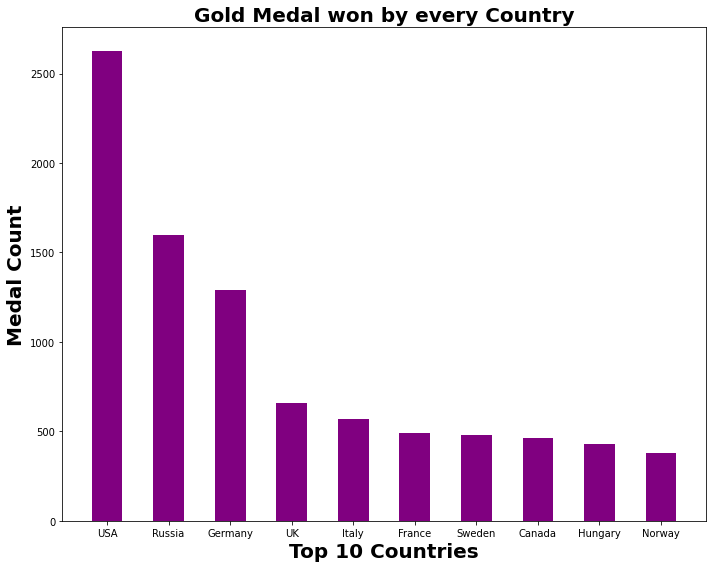

In [223]:
medals = df_gold.region.value_counts().reset_index(name = 'Medal').head(10)

plt.figure(figsize= (10,8))
plt.bar(medals['index'], medals['Medal'], color = 'purple', width= 0.5)


plt.xlabel('Top 10 Countries',size = 20, fontweight = 'bold')
plt.ylabel('Medal Count',size = 20, fontweight = 'bold')
plt.title('Gold Medal won by every Country', size = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

#### <b> Medals For Rio Olympics (2016)

In [234]:
all_teams = df_final[(df_final['Year'] == 2016) & (df_final['Medal'] == 'Gold')]

In [238]:
all_teams.region.value_counts()[:10]

USA          139
UK            64
Russia        52
Germany       49
China         46
Brazil        36
Australia     23
Argentina     21
France        20
Japan         17
Name: region, dtype: int64

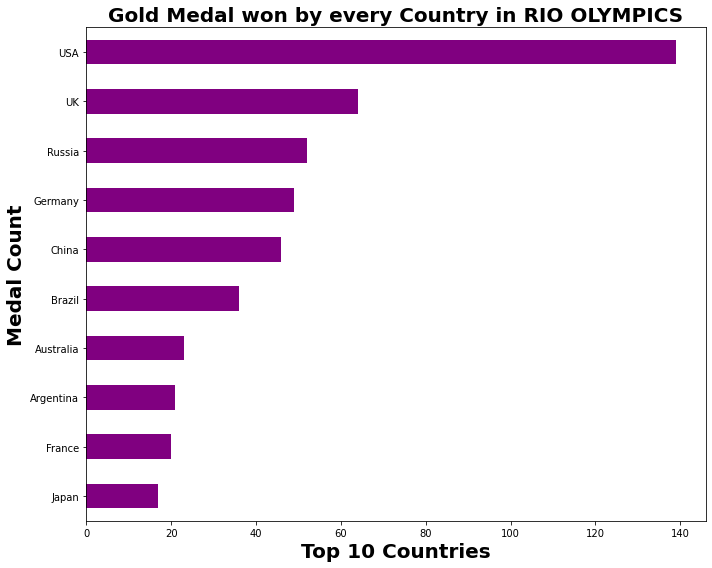

In [246]:
plt.figure(figsize= (10,8))
all_teams.region.value_counts()[:10].sort_values(ascending= True).plot(kind = 'barh',color = 'purple', width= 0.5)

plt.xlabel('Top 10 Countries',size = 20, fontweight = 'bold')
plt.ylabel('Medal Count',size = 20, fontweight = 'bold')
plt.title('Gold Medal won by every Country in RIO OLYMPICS', size = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

### <b> HEIGHT AND WEIGHT OF MALE AND FEMALE ATHLETE WHO WON THE MEDAL

In [247]:
# Filter the data for which athletes have won the medals:
all_medals = df_final[(df_final['Height'].notnull()) & (df_final['Weight'].notnull())]

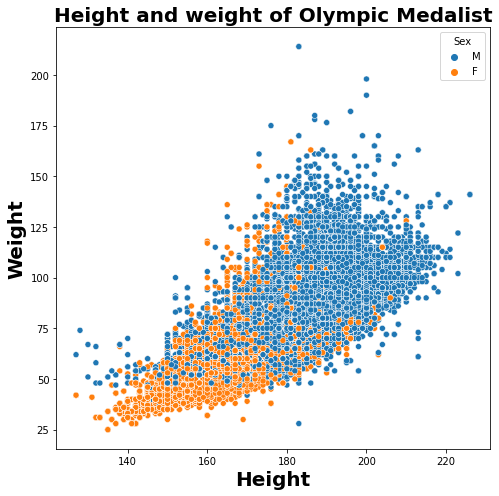

In [251]:
plt.figure(figsize= (7,7))
sns.scatterplot(data = all_medals, x = "Height", y = "Weight", hue = 'Sex')

plt.xlabel('Height',size = 20, fontweight = 'bold')
plt.ylabel('Weight',size = 20, fontweight = 'bold')
plt.title('Height and weight of Olympic Medalist', size = 20, fontweight = 'bold')

plt.tight_layout()
plt.show()

____________________________________